In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# generate some sample data
dates = pd.date_range('20220101', periods=100)
data = np.sin(np.arange(100)*2*np.pi/12) + np.random.randn(100)*0.1
df = pd.DataFrame({'Date': dates, 'Data': data})

# split the data into training and testing sets
train_size = int(len(df) * 0.7)
train_data, test_data = df[:train_size], df[train_size:]

# prepare the input data for training
X_train = np.array(train_data['Data']).reshape(-1, 1)
y_train = np.array(train_data['Data'].shift(-1)).reshape(-1, 1)

# train a linear regression model on the input data
model = LinearRegression()

In [2]:
# prepare the input data for testing
X_test = np.array(test_data['Data']).reshape(-1, 1)
y_test = np.array(test_data['Data'].shift(-1)).reshape(-1, 1)

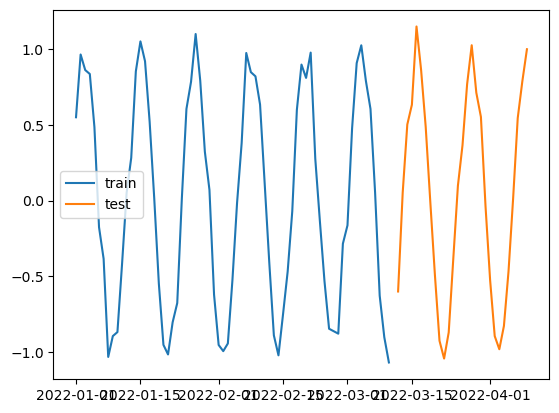

In [3]:
plt.plot(train_data['Date'], y_train, label='train')
plt.plot(test_data['Date'], y_test, label='test')
plt.legend()
plt.show()

In [4]:
import numpy as np
def fix(arr):
    mask = np.isnan(arr)
    for i in range(len(arr)):
        if mask[i]:
            if i == 0:
                arr[i] = np.nanmean(arr[i+1:i+3])
            elif i == len(arr)-1:
                arr[i] = np.nanmean(arr[i-2:i])
            else:
                arr[i] = np.nanmean(arr[i-1:i+2])

    return 

In [5]:
fix(X_train)
fix(y_train)

In [6]:
model.fit(X_train, y_train)

LinearRegression()

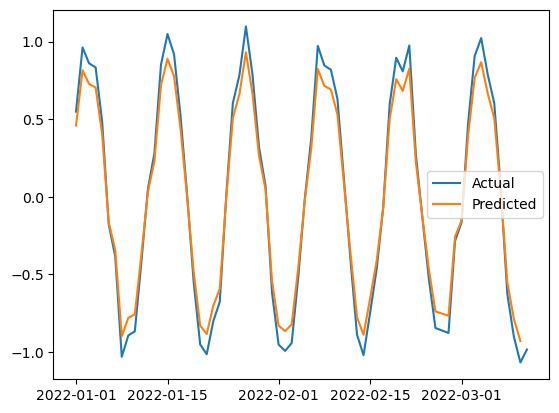

In [13]:
# use the trained model to make predictions on the test data
y_trainp = model.predict(X_train)

# plot the actual and predicted values
plt.plot(train_data['Date'], y_train, label='Actual')
plt.plot(train_data['Date'][:-1], y_trainp[1:], label='Predicted')
plt.legend()
plt.show()


/tmp/ipykernel_1934/977133984.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(test_data['Date'][:-1], y_pred[1:], label='Predicted')


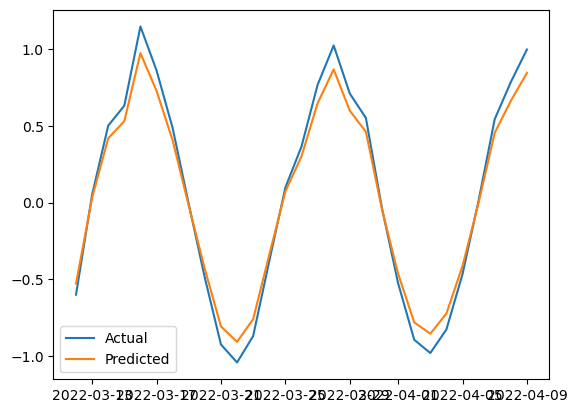

In [14]:
# use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# plot the actual and predicted values
plt.plot(test_data['Date'], y_test, label='Actual')
plt.plot(test_data['Date'][:-1], y_pred[1:], label='Predicted')
plt.legend()
plt.show()


2023-03-11 17:59:02.313633: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-11 17:59:04.316739: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-11 17:59:05.757193: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10214 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:09:00.0, compute capability: 8.6
2023-03-11 17:59:

Epoch 1/50


2023-03-11 17:59:09.161887: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-03-11 17:59:09.308719: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-11 17:59:09.357782: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7efa681843e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-11 17:59:09.357821: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-03-11 17:59:09.357831: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (1): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2023-03-11 17:59:09.364548: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-

4/4 [==============================] - 4s 160ms/step - loss: 0.3087 - val_loss: 0.2994
Epoch 2/50
4/4 [==============================] - 0s 14ms/step - loss: 0.2703 - val_loss: 0.2571
Epoch 3/50
4/4 [==============================] - 0s 13ms/step - loss: 0.2356 - val_loss: 0.2196
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 0.2048 - val_loss: 0.1868
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1760 - val_loss: 0.1592
Epoch 6/50
4/4 [==============================] - 0s 13ms/step - loss: 0.1531 - val_loss: 0.1360
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1311 - val_loss: 0.1183
Epoch 8/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1144 - val_loss: 0.1053
Epoch 9/50
4/4 [==============================] - 0s 13ms/step - loss: 0.1020 - val_loss: 0.0973
Epoch 10/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0913 - val_loss: 0.0943
Epoch 11/50
4/4 [======================

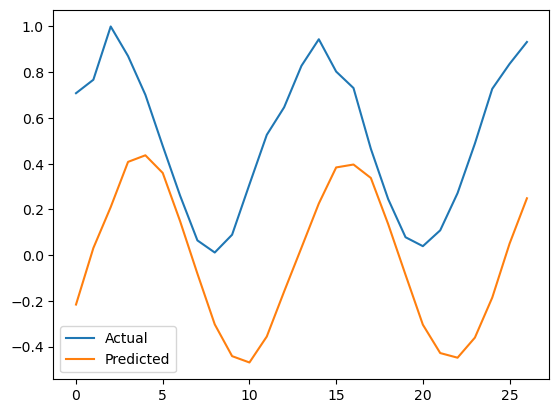

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['Data'].values.reshape(-1, 1))

# split the data into training and testing sets
train_size = int(len(scaled_data) * 0.7)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# prepare the input and output data for training
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 3
X_train, y_train = create_dataset(train_data, train_data, time_steps)
X_test, y_test = create_dataset(test_data, test_data, time_steps)

# build an LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(time_steps, 1)),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error')

# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_split=0.1, verbose=1)

# make predictions on the test data
y_pred = model.predict(X_test)

# unscale the predicted and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)




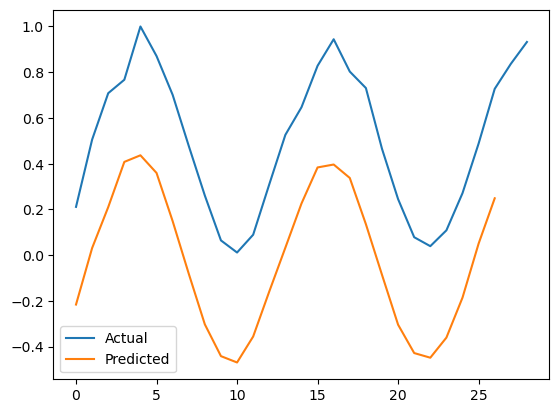

In [19]:
# plot the actual and predicted values
plt.plot(test_data[1:], label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [20]:
time_steps = 3
X_train, y_train = create_dataset(train_data, train_data, time_steps)
X_test, y_test = create_dataset(test_data, test_data, time_steps)

# build a dense neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(time_steps, 1)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error')

# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_split=0.1, verbose=1)

# make predictions on the test data
y_pred = model.predict(X_test)

Epoch 1/50
4/4 [==============================] - 2s 76ms/step - loss: 0.2830 - val_loss: 0.2559
Epoch 2/50
4/4 [==============================] - 0s 13ms/step - loss: 0.2283 - val_loss: 0.1935
Epoch 3/50
4/4 [==============================] - 0s 14ms/step - loss: 0.1786 - val_loss: 0.1443
Epoch 4/50
4/4 [==============================] - 0s 15ms/step - loss: 0.1353 - val_loss: 0.1127
Epoch 5/50
4/4 [==============================] - 0s 15ms/step - loss: 0.1074 - val_loss: 0.0947
Epoch 6/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0887 - val_loss: 0.0926
Epoch 7/50
4/4 [==============================] - 0s 14ms/step - loss: 0.0815 - val_loss: 0.1018
Epoch 8/50
4/4 [==============================] - 0s 19ms/step - loss: 0.0812 - val_loss: 0.1117
Epoch 9/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0855 - val_loss: 0.1170
Epoch 10/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0853 - val_loss: 0.1119
Epoch 11/50
4/4 [============

In [21]:
y_pred.shape
y_pred=y_pred.squeeze()
y_pred.shape

(27, 3)

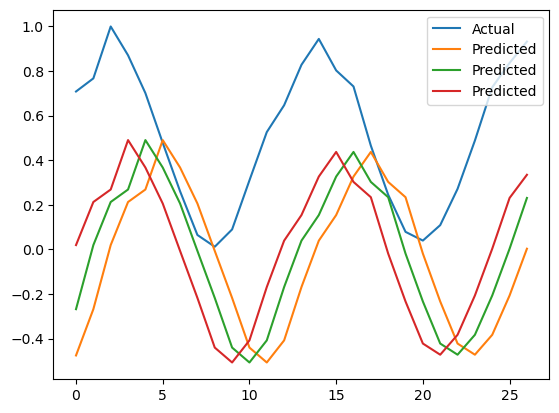

In [22]:
# unscale the predicted and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# plot the actual and predicted values
plt.plot(test_data[time_steps:], label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf


In [ ]:
# build a transformer model (in progress, this keras version does not have a Transformer layer)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(time_steps, 1)),
    #tf.keras.layers.Transformer(num_layers=2, d_model=32, num_heads=2, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error')

# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_split=0.1, verbose=1)

# make predictions on the test data
y_pred = model.predict(X_test)
y_pred=y_pred.squeeze()
# unscale the predicted and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# plot the actual and predicted values
plt.plot(test_data[time_steps:], label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()
